In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train,y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

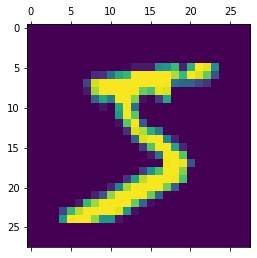

In [14]:
plt.matshow(X_train[0])

In [15]:
y_train[0]

5

In [16]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
# Feature Scaling
X_train = X_train / 255
X_test = X_test / 255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
#Flatten matrix into vector
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [29]:
X_train_flattened.shape

(60000, 784)

In [30]:
X_test_flattened.shape

(10000, 784)

In [31]:
# create a simple neural network
# sequencial ---> means i am having a sequence of layers in my neural networks
# dense means all the neurons in 1 layer are connected with every other neuron in other layer
# input shape is 784 and output shape is 10
# activation function is sigmoid
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
 ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

2022-01-19 11:08:07.380070: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4732 - accuracy: 0.8750
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3045 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9263


In [33]:
 model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9265


[0.2664142847061157, 0.9265000224113464]

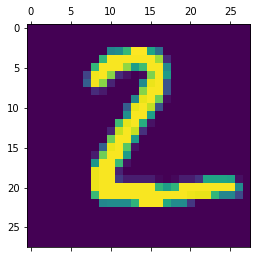

In [40]:
plt.matshow(X_test[1])

In [37]:
y_predicted = model.predict(X_test_flattened)

In [41]:
y_predicted[1]

array([3.8213331e-01, 6.7215264e-03, 9.9950743e-01, 4.0828449e-01,
       9.5335828e-10, 8.6135018e-01, 9.3017280e-01, 1.0620239e-12,
       2.0972234e-01, 3.8211545e-09], dtype=float32)

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
# find maximum value in the array and print the index of that value
np.argmax(y_predicted[1])

2

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    8,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,   10,  923,   17,    9,    2,   13,    9,   43,    3],
       [   2,    0,   18,  924,    0,   21,    4,   12,   24,    5],
       [   1,    1,    3,    1,  926,    0,   10,    4,   10,   26],
       [   7,    3,    2,   34,   11,  769,   18,    6,   35,    7],
       [   9,    3,    5,    2,    8,   11,  914,    2,    4,    0],
       [   1,    6,   22,    8,    8,    0,    0,  953,    4,   26],
       [   4,    8,    6,   17,    9,   20,   10,   12,  882,    6],
       [  10,    7,    1,    9,   34,    6,    0,   29,    9,  904]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

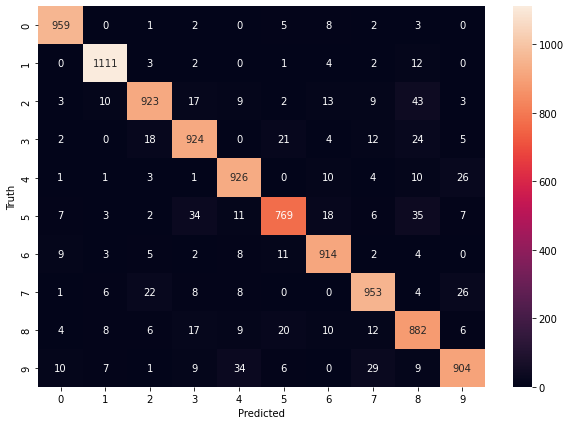

In [46]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
# Now increase the hidden layer and check your accuracy
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
 ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

2022-01-19 11:23:45.602336: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1223 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0859 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0517 - accuracy: 0.9837


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9747


[0.07837733626365662, 0.9746999740600586]

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    2,    2,    2,    2,    2,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   4,    0, 1005,    1,    3,    0,    2,    7,   10,    0],
       [   0,    0,   12,  973,    0,   13,    0,    6,    3,    3],
       [   0,    0,    3,    1,  954,    0,    4,    1,    2,   17],
       [   2,    0,    1,    2,    3,  871,    5,    1,    3,    4],
       [   5,    3,    0,    1,    9,   10,  926,    0,    4,    0],
       [   1,    7,   11,    2,    2,    0,    0,  995,    1,    9],
       [   7,    0,    3,    3,    4,    7,    2,    3,  941,    4],
       [   1,    5,    0,    2,    5,    3,    1,    4,    0,  988]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

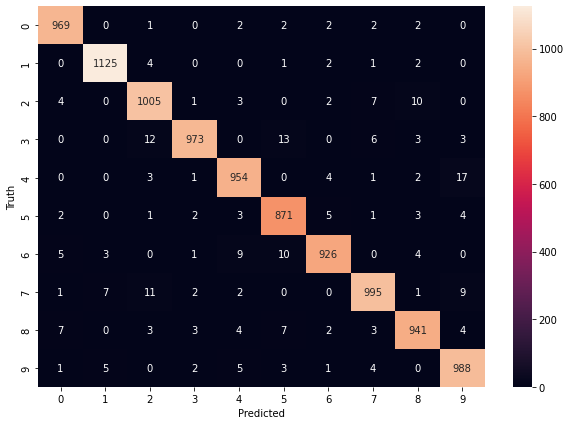

In [53]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
# we have to flatten our matrix so keras comes with inbuilt flatten method
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
 ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

2022-01-19 11:29:08.442128: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2747 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0660 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9838
